# Class Project
### Description
This data set consists of three types of entities: (a) the specification of an auto in terms of various
characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to
other cars. The second rating corresponds to the degree to which the auto is more risky than its
price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is
more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this
process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
The third factor is the relative average loss payment per insured vehicle year. This value is
normalized for all autos within a particular size classification (two-door small, station wagons,
sports/speciality, etc...), and represents the average loss per car per year.
Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the
different segments of the population.
Steps to follow
1. Cleaning and EDA: Check for data quality issues.
You must evaluate the quality of the data, as well as understanding the relationship between features and the target variable.
2. Predictive models: Train predictive models (at least 3) that will allow you to estimate the insurance risk rating of a car from the values of the other variables. Choose the best model, looking for its optimal parameters.
You must include a section in which you establish the evaluation protocols and the models’ training and evaluation processes.
3. Dimensionality reduction: Considering all the variables, perform a principal component analysis (PCA), choosing the number of components necessary to preserve at least 80% of the original representation.
4. Characterizing the cars: With the data in its new representation, perform a segmentation, establishing the best number of clusters between 3 and 5. Characterize the clusters with respect to the original variables.

## // Si ven esto desde Google Collab, ordenamos todo con la tabla de contenido usando headers de Mark-Down para mejor navegacion.

## **1. CLEANING AND EDA**

### Importar y ordenar datos

In [104]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math #matematica
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #graficas
import sklearn as sk
from sklearn import datasets #modelos
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

In [105]:
import warnings
warnings.filterwarnings('ignore')



---



In [106]:
column_names = ["Symbolizing","Normalized_losses", "Make", "Fuel_type", "Aspiration", 
                "Num_of_doors", "Body_style", "Drive_wheels", "Engine_location", 
                "Wheel_base", "Length", "Width", "Heigth", "Curb_weight", "Engine_type",
                "Num_of_cylinders", "Engine_size", "Fuel_system", "Bore", "Stroke",
                "Compression_ratio", "Horse_power", "Peak_rpm", "City_mpg", 
                "Highway_mpg", "Price"]
                

data = pd.read_csv('imports-85.data', sep=',', names=column_names)


data.head()

,Symbolizing,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [107]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbolizing        205 non-null    int64  
 1   Normalized_losses  205 non-null    object 
 2   Make               205 non-null    object 
 3   Fuel_type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num_of_doors       205 non-null    object 
 6   Body_style         205 non-null    object 
 7   Drive_wheels       205 non-null    object 
 8   Engine_location    205 non-null    object 
 9   Wheel_base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Heigth             205 non-null    float64
 13  Curb_weight        205 non-null    int64  
 14  Engine_type        205 non-null    object 
 15  Num_of_cylinders   205 non-null    object 
 16  Engine_size        205 non

In [108]:
data['Normalized_losses'] = pd.to_numeric(data['Normalized_losses'], errors = 'coerce')

to_convert = ['Bore', 'Stroke', 'Horse_power', 'Peak_rpm', 'Price']

for i in to_convert:
  data[i] = pd.to_numeric(data[i], errors = 'coerce')


In [109]:
data['Normalized_losses'] = data['Normalized_losses'].fillna(0)

for i in to_convert:
  data[i] = data[i].fillna(0)


data["Normalized_losses"]

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: Normalized_losses, Length: 205, dtype: float64

### Baseline Global (Variable Dependiente)

<AxesSubplot: xlabel='Symbolizing', ylabel='count'>

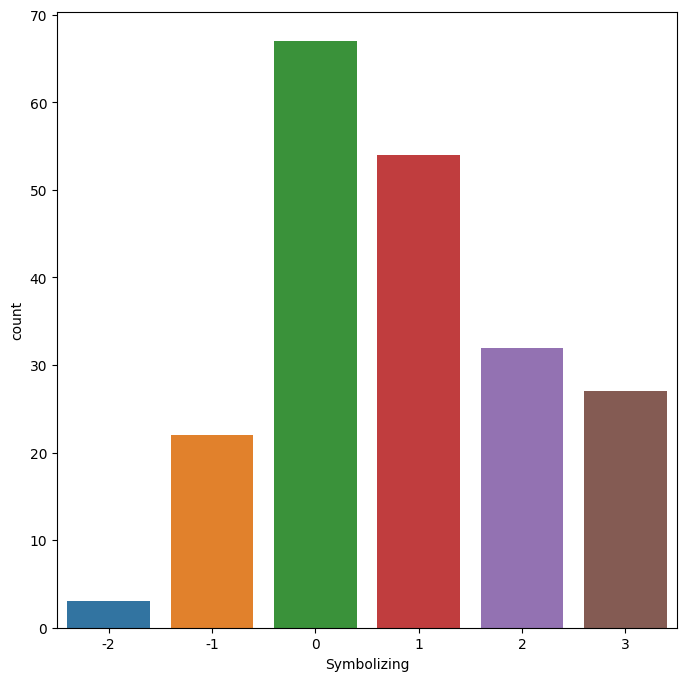

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x="Symbolizing", data=data)


Se puede observar que no hay ningun carro dentro del nivel de riesgo -3. Ademas, la cantidad de carros dentro de los niveles negativos hacen parte de la minoria significativa, la mayoria estando en 0 de adelante. 

Esto quiere decir que, al momento de predecir el nivel de riesgo, es posible que el modelo se equivoque mas en los valores negativos, ya que hay poca o inexistente cantidad de datos

### Cantidades Variables Categoricas

In [8]:
cat_vars = ['Make', 'Fuel_type', 'Aspiration', 'Num_of_doors','Body_style', 'Drive_wheels', 'Engine_location', 'Engine_type', 'Fuel_system', 'Num_of_cylinders']


#### Make

<AxesSubplot: xlabel='Make', ylabel='count'>

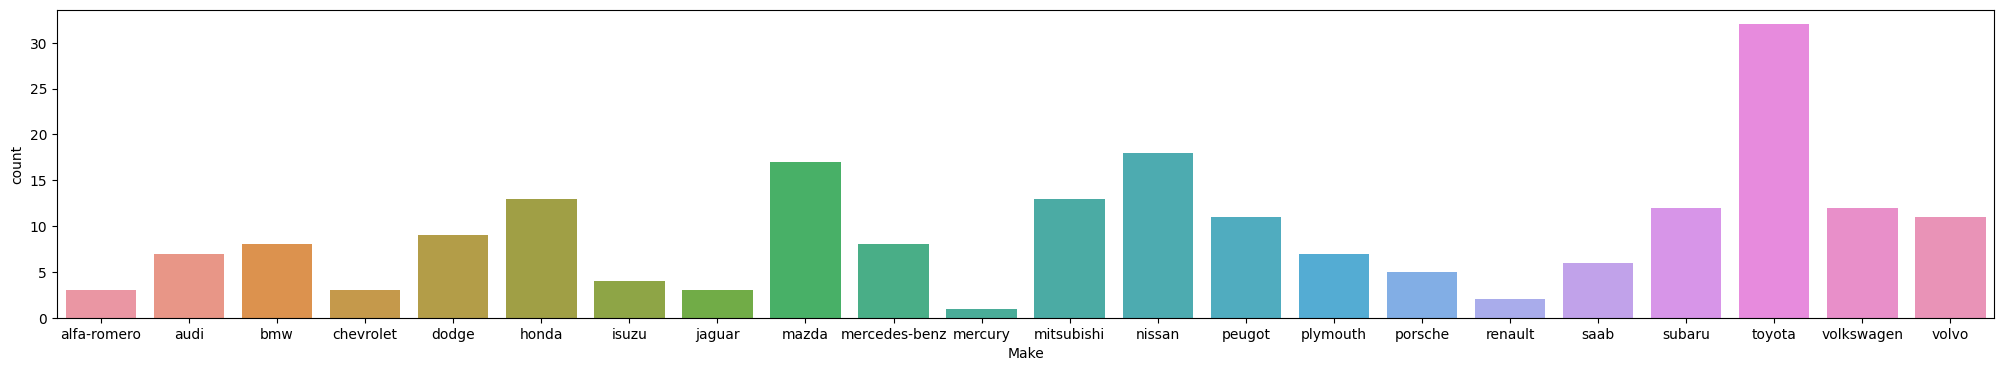

In [9]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[0], data=data)

El modelo tendra mas informacion sobre carros de marca toyota que de marca mercurio o renault

#### Fuel_type

<AxesSubplot: xlabel='Fuel_type', ylabel='count'>

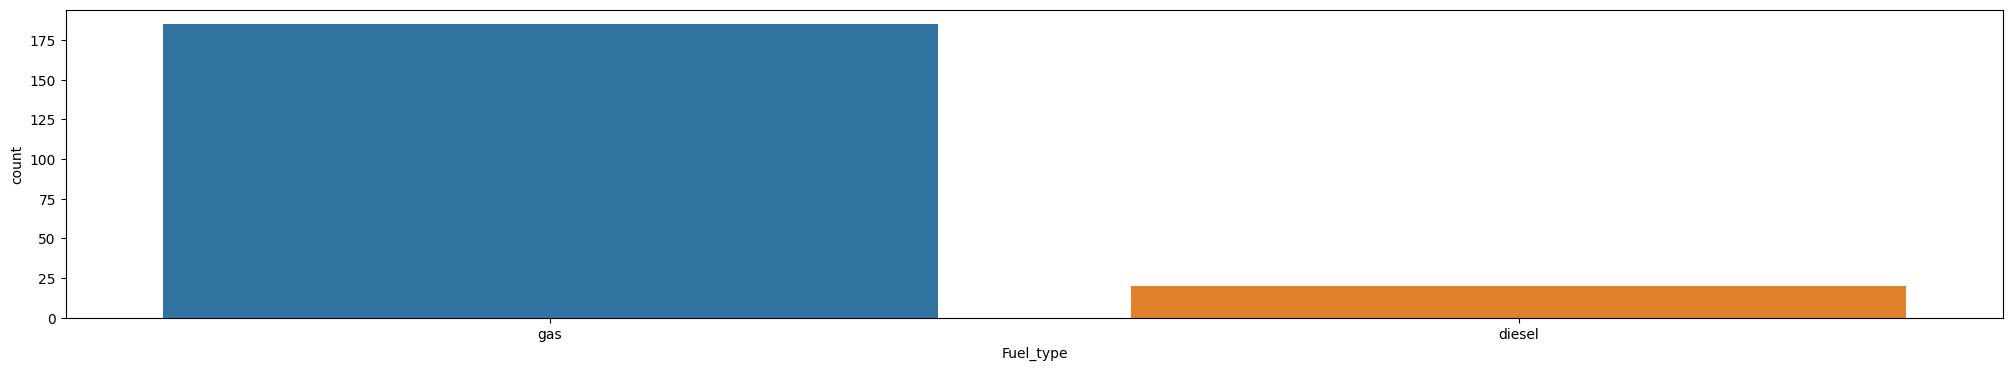

In [10]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[1], data=data)

In [11]:
pd.crosstab(index=data["Fuel_type"], columns="count")

col_0,count
Fuel_type,
diesel,20
gas,185


la gran mayoria de carros utilizan gas. En el caso que la correlacion entre riesgo cuando se utilice diesel no sea significante, esta variable puede que no sea muy util

#### Aspiration

<AxesSubplot: xlabel='Aspiration', ylabel='count'>

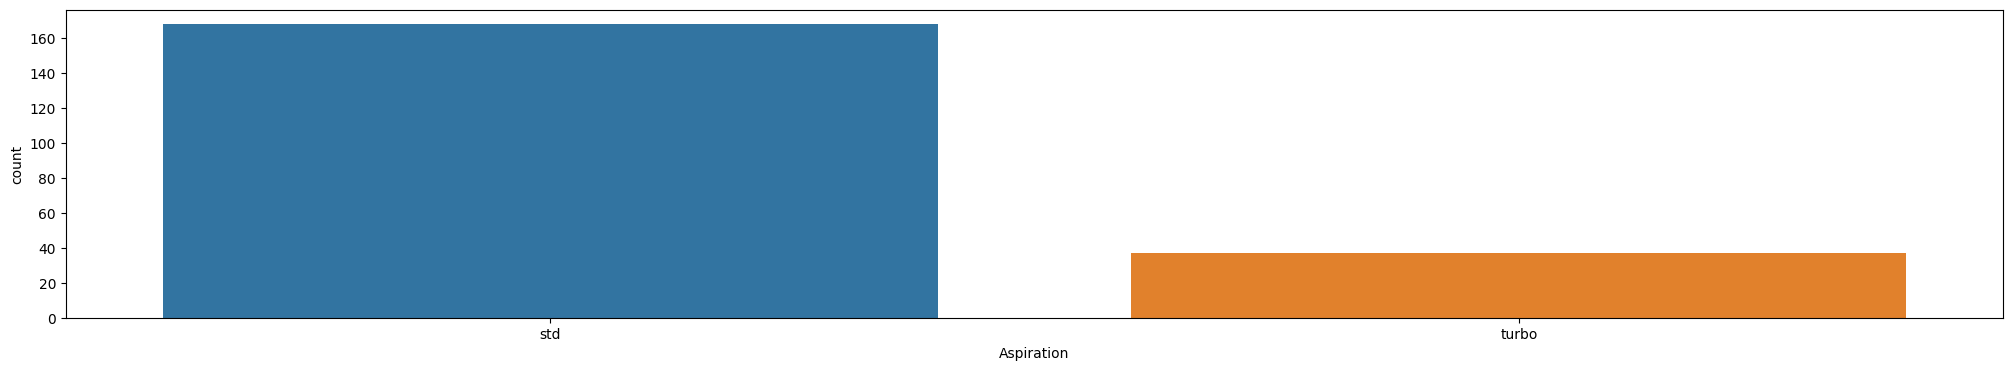

In [12]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[2], data=data)

De forma similar al punto anterior, seria importante enfocarse en esta variable si el uso de turbo aumenta o disminuye el riesgo repetitivamente

#### Num_of_doors

<AxesSubplot: xlabel='Num_of_doors', ylabel='count'>

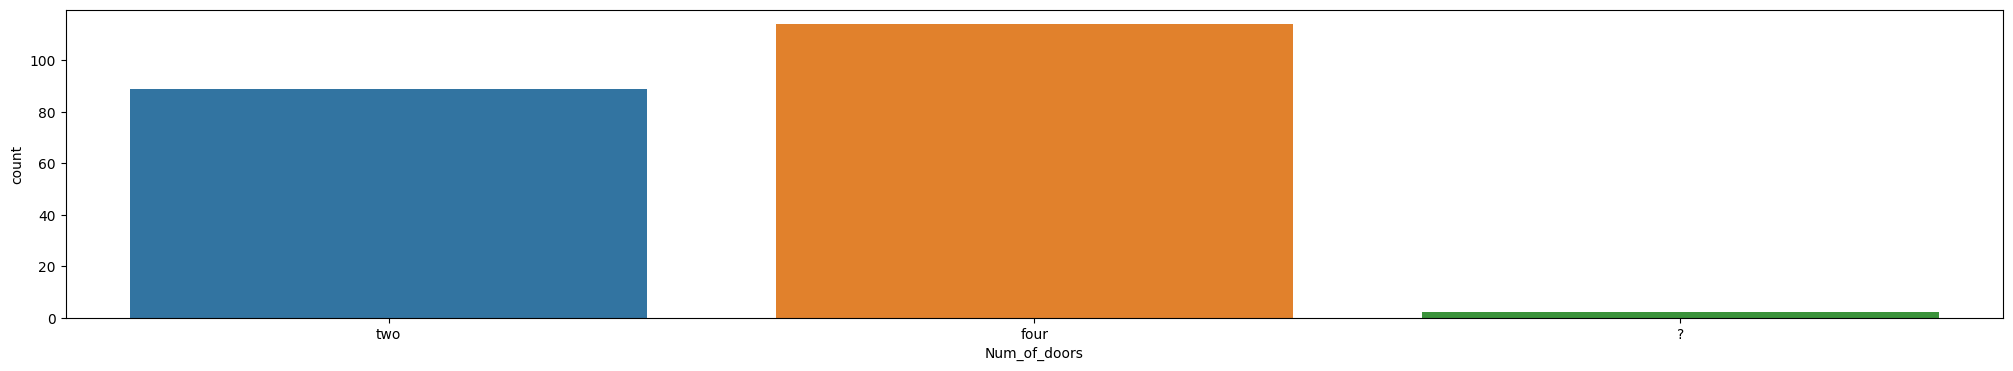

In [13]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[3], data=data)

In [14]:
pd.crosstab(index=data["Num_of_doors"], columns="count")

col_0,count
Num_of_doors,
?,2
four,114
two,89


Aqui empiezan a aparecer los errores, por el lado de las variables cualitativas. La cantidad de estos es minima, asi que no es necesario borrar la variable entera. Sin embargo, ya que un vehiculo utiliza pares de ruedas, se podra suponer que el campo (?) significa "seis o mas" o "anormal". Aun asi, seria una poblacion muy pequeña para generar un peso significativo en el modelo

#### Body_style

<AxesSubplot: xlabel='Body_style', ylabel='count'>

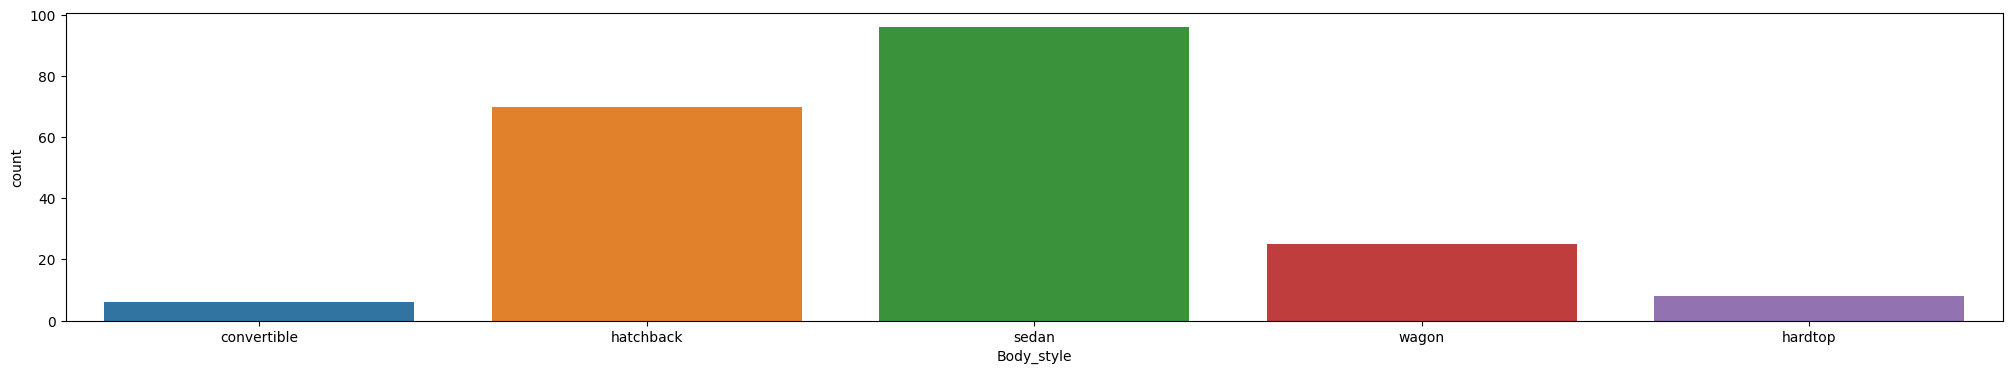

In [15]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[4], data=data)

Similar a los primeros puntos analizados, hay poca cantidad de convertibles y "coraza dura".

#### Drive_wheels

<AxesSubplot: xlabel='Drive_wheels', ylabel='count'>

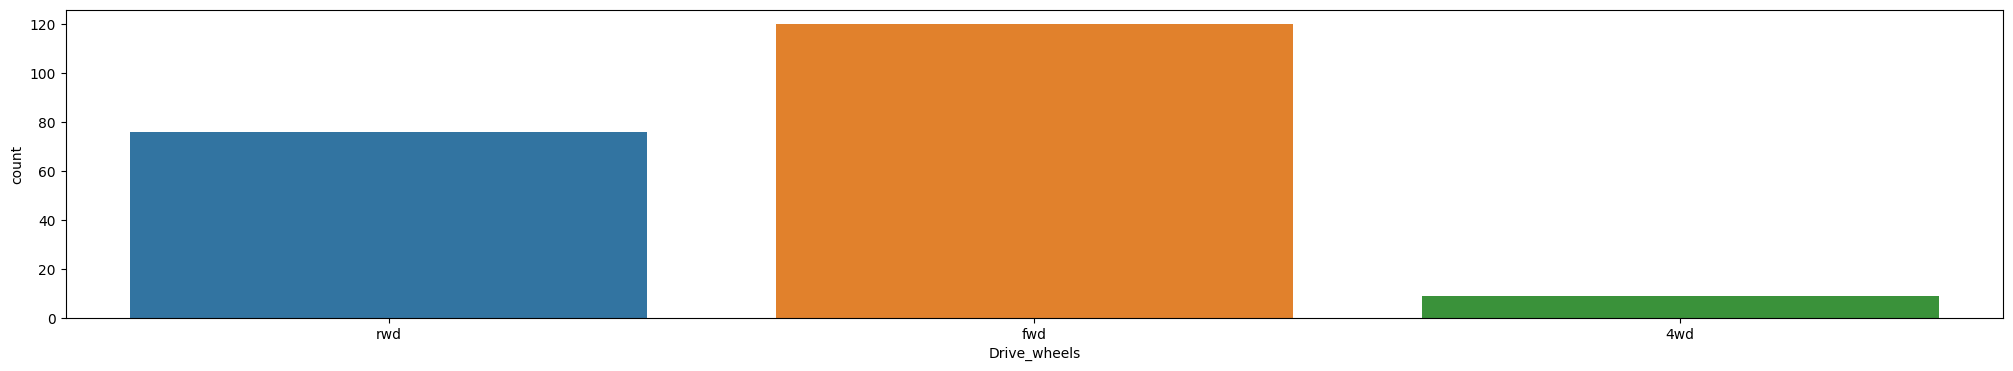

In [16]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[5], data=data)

nada nuevo...

#### Engine_location

<AxesSubplot: xlabel='Engine_location', ylabel='count'>

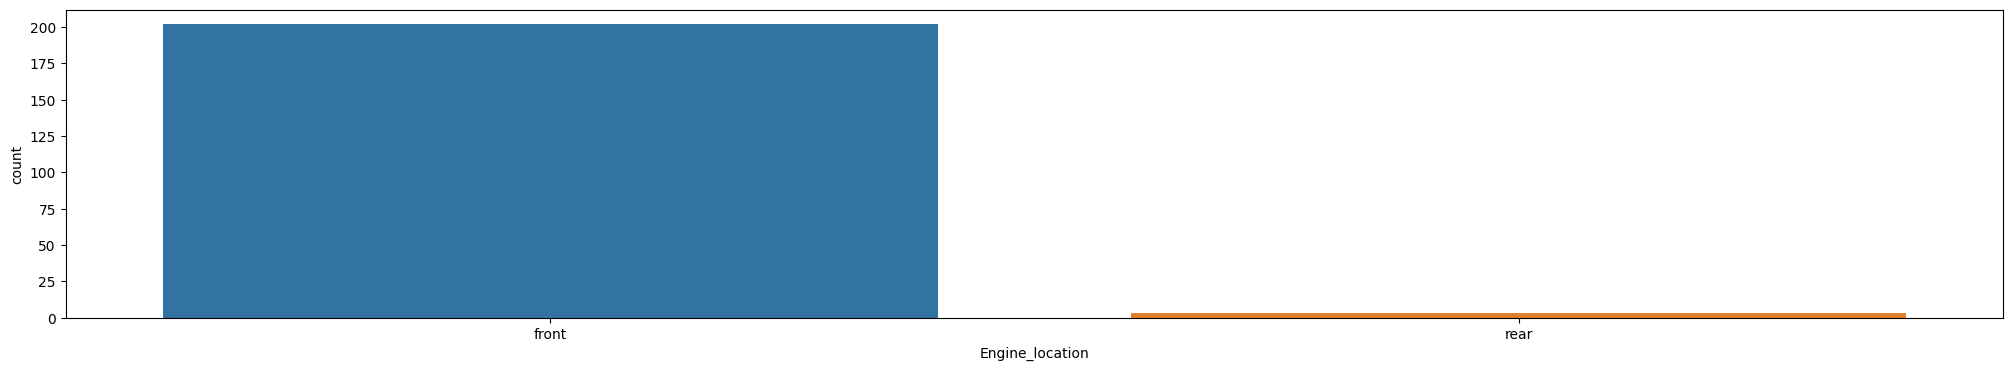

In [17]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[6], data=data)

In [18]:
pd.crosstab(index=data["Engine_location"], columns="count")

col_0,count
Engine_location,
front,202
rear,3


Aqui, la cantidad de carros con el motor en la parte de atras es minuscula. Se podria considerar, si estos carros generan errores repetitivamente en otros campos, borrar estos 3 valores sin mucha repercusion

#### Engine_type

<AxesSubplot: xlabel='Engine_type', ylabel='count'>

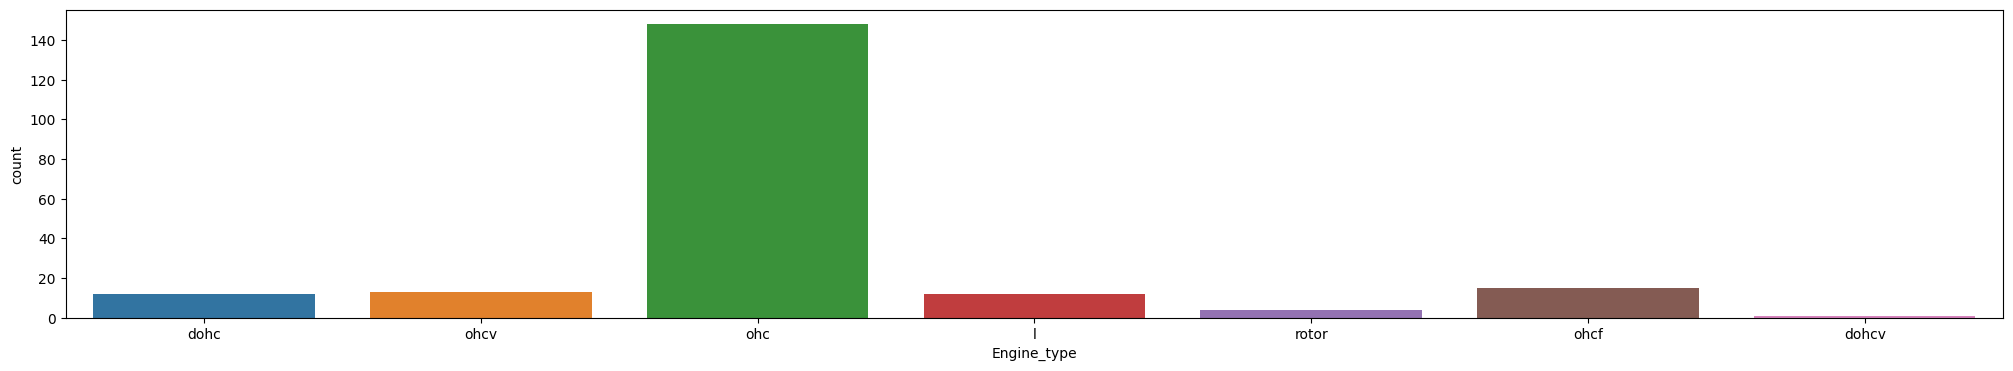

In [19]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[7], data=data)

In [20]:
pd.crosstab(index=data["Engine_type"], columns="count")

col_0,count
Engine_type,
dohc,12
dohcv,1
l,12
ohc,148
ohcf,15
ohcv,13
rotor,4


Aqui, el tipo de motor principal es ohc, y por mucho (en promedio 10 veces mayor en comparacion a los demas). En el otro extremo, solo un vehiculo utiliza dohcv, y 4 utilizan rotor.

Una solucion para la diferencia masiva entre estos valores podria ser unificar las columnas de esta variable, de manera que solo hayan dos: vehiculos que utilicen ohc, y vehiculos que no.

#### Fuel_system

<AxesSubplot: xlabel='Fuel_system', ylabel='count'>

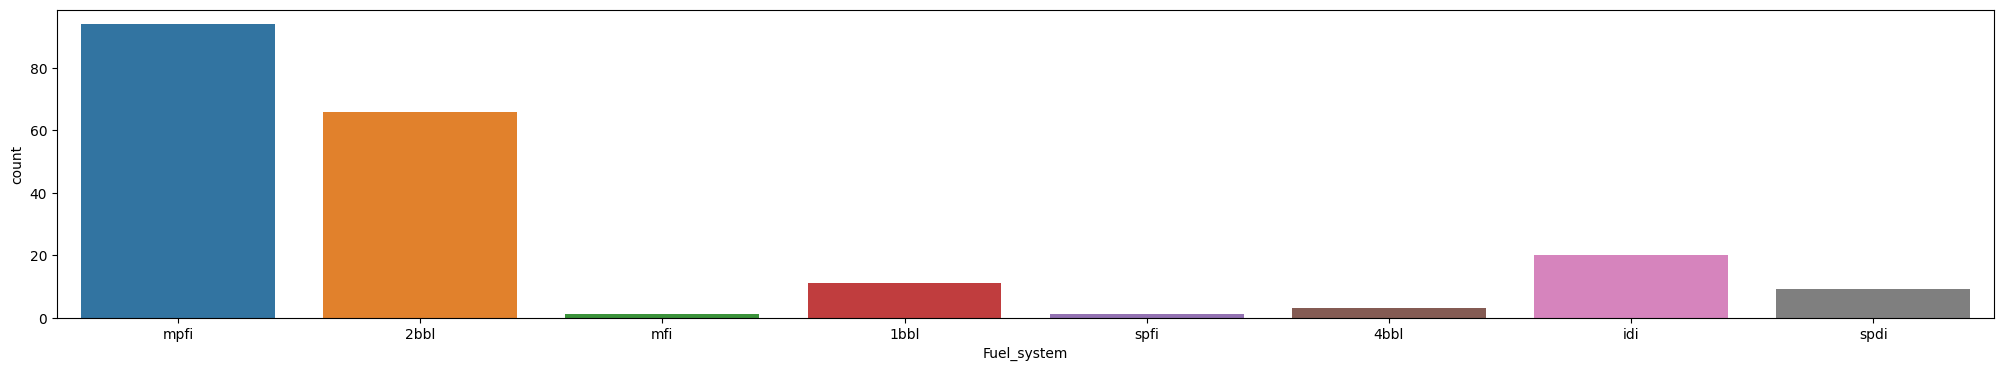

In [21]:
plt.figure(figsize=(25,4))
sns.countplot(x=cat_vars[8], data=data)

In [22]:
pd.crosstab(index=data["Fuel_system"], columns="count")

col_0,count
Fuel_system,
1bbl,11
2bbl,66
4bbl,3
idi,20
mfi,1
mpfi,94
spdi,9
spfi,1


Esta variable puede ser mas problematica que la anterior, ya que tiene valores extremadamanete pequeños (atipicos) como spfi, mfi y 4bbl, pero el resto de valores son significativamente grandes, comparados con el mas grande.

Dependiendo de la correlacion de esta variable con el riesgo, se podria cuestionar la importancia de algunos valores.

#### Num_of_cylinders

<AxesSubplot: xlabel='Num_of_cylinders', ylabel='count'>

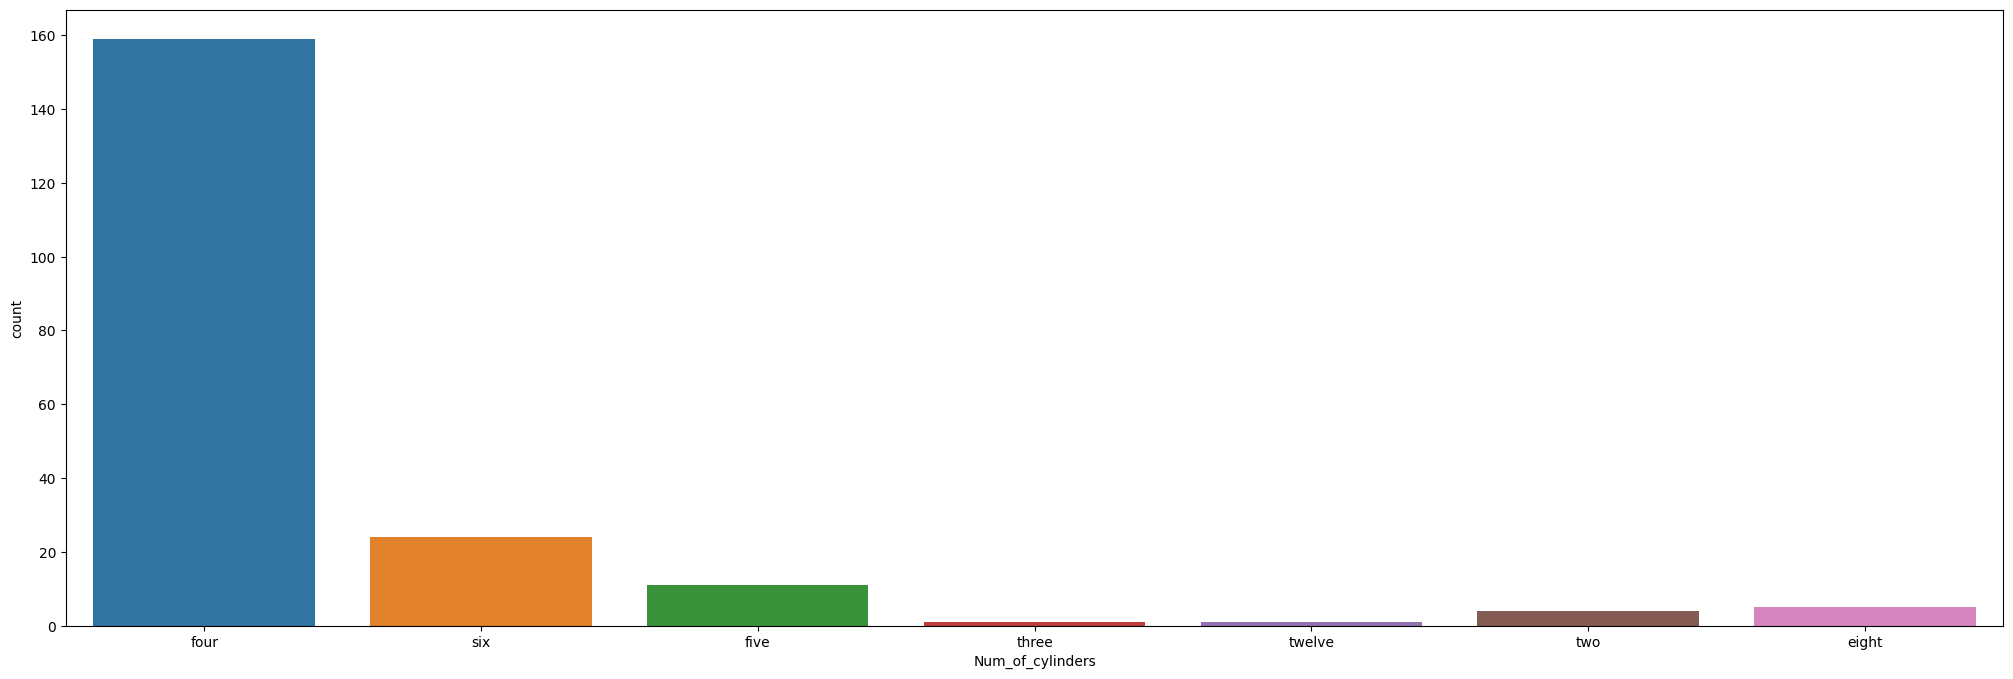

In [23]:
plt.figure(figsize=(25,8))
sns.countplot(x=cat_vars[9], data=data)

In [24]:
pd.crosstab(index=data["Num_of_cylinders"], columns="count")

col_0,count
Num_of_cylinders,
eight,5
five,11
four,159
six,24
three,1
twelve,1
two,4


### Promedios Variables Cuantitativas

In [25]:
cuant_var = ['Normalized_losses', 'Wheel_base', 'Length', 'Width', 'Heigth', 'Curb_weight', 'Engine_size', 'Bore', 'Stroke', 'Compression_ratio', 'Horse_power', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'Price']

#### Normalized_losses

In [26]:
pvc = 0
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Normalized_losses:  97.6


In [27]:
data.Normalized_losses

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: Normalized_losses, Length: 205, dtype: float64

Al estar mas cerca del rango inferior, en promedio, las perdidas normalizadas son menores en general.

Cabe recalcar que hay valores erroneos en esta variable. Resulta que hay celdas cuyo valor es igual a 0, lo cual esta fuera del rango aceptado. Esto posiblemente quiera decir que en este vehiculo no hubo perdidas.

In [28]:
pvc_nl = 0
for i in data.Normalized_losses:
  if (i < 64 or i > 256): #por si hay valores que no sean 0 pero esten fuera del rango
    print(pvc_nl," : ",i)
  pvc_nl += 1

0  :  0.0
1  :  0.0
2  :  0.0
5  :  0.0
7  :  0.0
9  :  0.0
14  :  0.0
15  :  0.0
16  :  0.0
17  :  0.0
43  :  0.0
44  :  0.0
45  :  0.0
46  :  0.0
48  :  0.0
49  :  0.0
63  :  0.0
66  :  0.0
71  :  0.0
73  :  0.0
74  :  0.0
75  :  0.0
82  :  0.0
83  :  0.0
84  :  0.0
109  :  0.0
110  :  0.0
113  :  0.0
114  :  0.0
124  :  0.0
126  :  0.0
127  :  0.0
128  :  0.0
129  :  0.0
130  :  0.0
131  :  0.0
181  :  0.0
189  :  0.0
191  :  0.0
192  :  0.0
193  :  0.0


De hecho, la cantidad de carros cuyas perdidas es 0 es palpable, asi que no se deberia considerar borrar estas celdas.

#### Wheel_base

In [29]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Wheel_base:  98.75658536585367


El tamaño de la rueda es promedio, acercandose a un tamaño menor, posiblemente signifique que hay mayor cantidad de carros pequeños

#### Length

In [30]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Length:  174.04926829268288


El promedio esta cerca de la mitad del rango de longitud (~140 : 200), lo cual (al menos en la longitud) invalida el anterior argumento

#### Width

In [31]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Width:  65.90780487804878


Lo mismo que el anterior...

#### Height

In [32]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Heigth:  53.72487804878049


En promedio tiende (minimamente) hacia menor altura

#### Curb_weight

In [33]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Curb_weight:  2555.5658536585365


Este promedio esta significativamente mas cerca al limite inferior. Quiere decir que esta muestra de carros es mas ligera.

#### Engine_size

In [34]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Engine_size:  126.90731707317073


Este valor tambien esta mas cercano al rango inferior, lo que quiere decir que la mayoria de motores son pequeños

#### Bore

In [35]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Bore:  3.264780487804878


Nada de importancia...

#### Stroke

In [36]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Stroke:  3.19190243902439


En el medio...

#### Compression_ratio

In [37]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Compression_ratio:  10.142536585365855


Muy cerca limite inferior

#### Horse_power

In [38]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Horse_power:  103.2390243902439


En promedio los carros tienen menores caballos de fuerza que lo que espera el promedio. Posiblemente quiere decir que son carros mas domesticos

#### Peak_rpm

In [39]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Peak_rpm:  5075.365853658536


Los rpm tambien son promedio

#### City_mpg

In [40]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

City_mpg:  25.21951219512195


Esto quiere decir que la mayoria de carros van por debajo del limite de velocidad

#### Highway_mpg

In [41]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Highway_mpg:  30.75121951219512


Esta mas cercano al limite inferior. Quiere decir que estos carros no estan hechos para andar a altas velocidades en promedio

#### Price

In [42]:
print(cuant_var[pvc] + ": ", data[cuant_var[pvc]].mean())
pvc += 1

Price:  12949.429268292683


En promedio, los carros son de menor precio, ya que no se acercan a los 55k

### Relacion entre variables **Categoricas** y Riesgo

#### Make

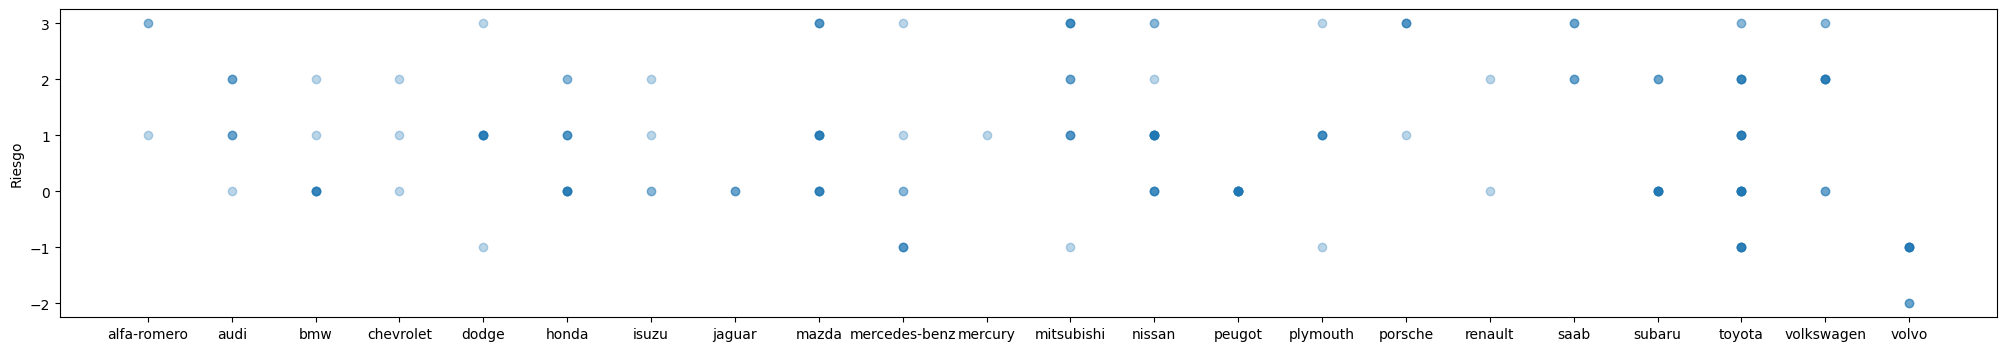

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(25,4))
ax.scatter(x=data[cat_vars[0]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Solo las marcas dodge, mercedes-benz, mitsubishi, plymouth, toyota y volvo tienen vehiculos dentro del rango de riesgo negativo.

Se podria predecir que, si un vehiculo hace parte de alguna de estas marcas, es probable que pueda tener un nivel de riesgo bajo o medio.

Por otro lado, las marcas alfa-romero, mercury y porsche estan fuera del rango negativo y medio de riesgo. Esto quiere decir que, probablemente, un carro manufacturado por esta marca es de alto riesgo.

#### Fuel_type

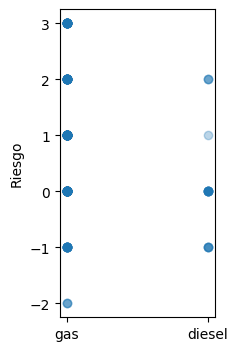

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[1]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Retomando las conclusiones en el analisis de las cantidades de variables categoricas, Se puede concluir que si es importante analizar la diferencia entre gas y diesel, ya que los vehiculos que utilizan gas pueden tener riesgo minimo y maximo, pero no cuando usan diesel, aunque hay mayor riesgo en esta columna.

#### Aspiration

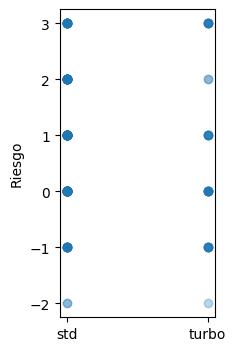

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[2]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Las dos columnas son relativamente similares, por ende, de por si, puede que no tengan mucha relevancia frente al cambio de riesgo, asi que tal vez no sea necesario analizarla.

#### Num_of_doors

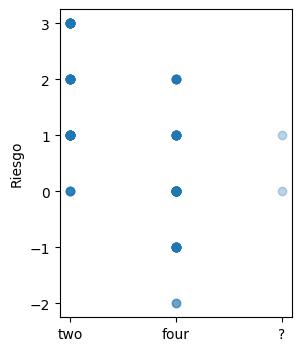

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(x=data[cat_vars[3]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Todos los vehiculos con dos puertas (o posiblemente seis o mas puertas) tienen un riesgo alto o medio, mientras que los vehiculos con cuatro puertas pueden tener el menor nivel de riesgo, pero no el mayor.

Quiere decir que es mas probable que un vehiculo sea menos riesgoso si tiene cuatro puertas

#### Body_style

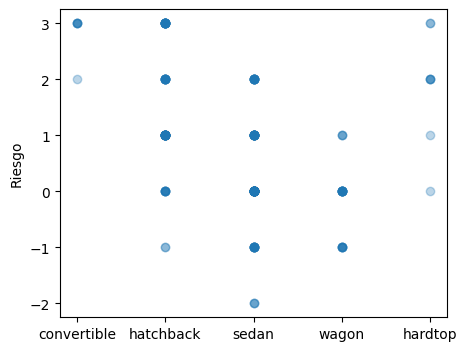

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(x=data[cat_vars[4]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Esto hace que sea immportante notar a los convertibles y "coraza dura", ya que, pese a que son la minoria, se puede ver que tienen en promedio poco riesgo.

Por otro lado, los estilos de cuerpo sedan son los menos peligrosos

#### Drive_wheels

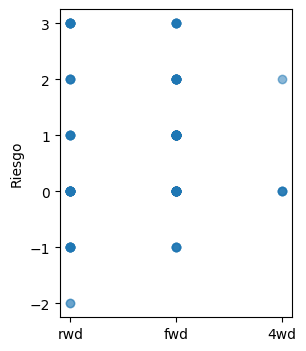

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(x=data[cat_vars[5]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

No es muy seguro decir que 4wd es en promedio mas segura que las demas, ya que su cantidad de muestra es relativamente baja.

Ademas de esto, se puede decir que, asi sea por poco, fwd es mas seguro que rwd.

#### Engine_location

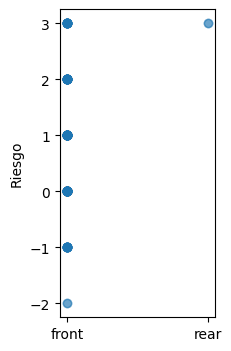

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(2,4))
ax.scatter(x=data[cat_vars[6]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

La cantidad de datos en rear hace que no sea posible generar una conclusion valida respecto a su diferencia. 

Al tener valores en todos los modos de riesgo, puede que no sea pertinente analizar esta variable

#### Engine_type

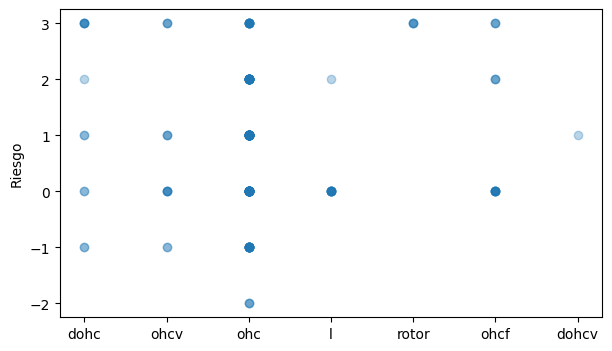

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.scatter(x=data[cat_vars[7]], y=data.Symbolizing, alpha= 0.3)
ax.set_ylabel('Riesgo');

Ya que ohc tiene la mayor cantidad de datos, se podria decir que su correlacion con el riesgo es mas certera que los demas (especialmente dohcv, donde solo hay **1** carro).

Sin embargo, otra vez, esta conclusion podria cambiar si se analiza en vez dos columnas: es ohc, y no es ohc. Si se realizara este cambio, se podria concluir que los motores que no son de tipo ohc no llegan a tener un minimo nivel de riesgo, y tienen pocas incidencias en el penultimo nivel.

#### Fuel_system

In [51]:
items = data.Fuel_system.unique()

counts = data['Fuel_system'].value_counts()
print(items, counts)

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: Fuel_system, dtype: int64


<AxesSubplot: xlabel='Fuel_system', ylabel='Symbolizing'>

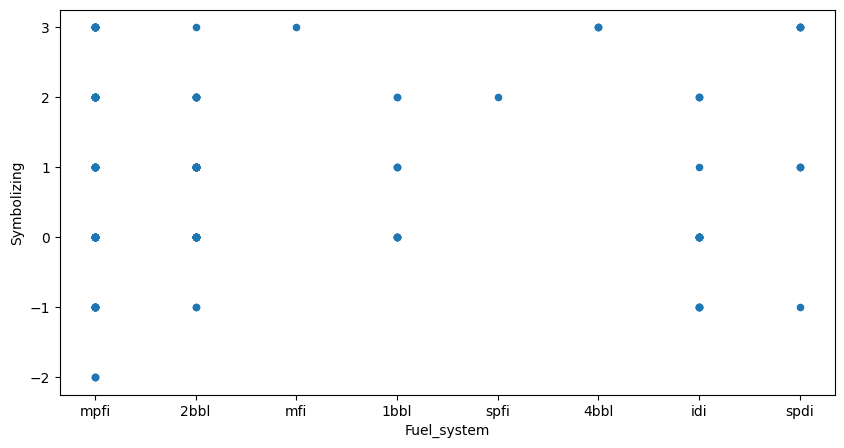

In [52]:
data[['Fuel_system','Symbolizing']].plot(x='Fuel_system', y='Symbolizing',kind='scatter', figsize=(10,5))

In [53]:
cross = pd.crosstab(data.Fuel_system, data.Symbolizing)
print(cross)

Symbolizing  -2  -1   0   1   2   3
Fuel_system                        
1bbl          0   0   6   3   2   0
2bbl          0   2  21  34   8   1
4bbl          0   0   0   0   0   3
idi           0   5  11   1   3   0
mfi           0   0   0   0   0   1
mpfi          3  14  29  13  18  17
spdi          0   1   0   3   0   5
spfi          0   0   0   0   1   0


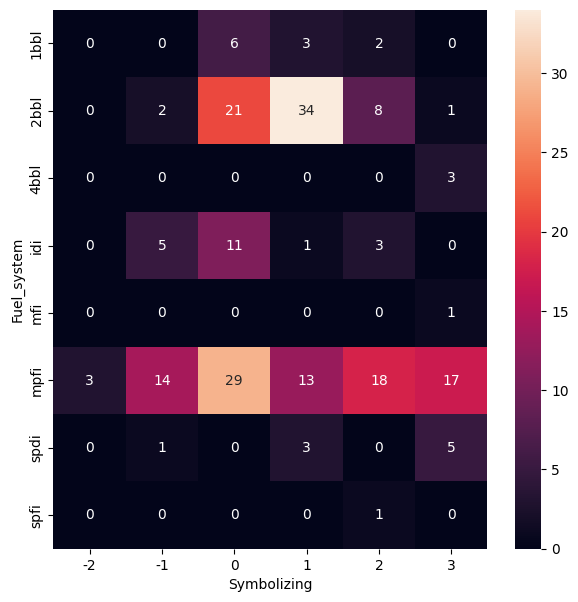

In [54]:
plt.figure(figsize=(7, 7))
sns.heatmap(cross, annot=True)
plt.show()

In [55]:
typeof(cross)

NameError: name 'typeof' is not defined

...lo mismo aqui, solo que mpfi tiene mas carros en el maximo nivel de riesgo que los demas sistemas de combustible (excepto spdi)

### Variables Normalizadas

In [56]:
copy_of_data = data.copy()

for i in cuant_var:
  copy_of_data[i] = copy_of_data[i] /copy_of_data[i].abs().max()

print(copy_of_data)


     Symbolizing  Normalized_losses         Make Fuel_type Aspiration  \
0              3           0.000000  alfa-romero       gas        std   
1              3           0.000000  alfa-romero       gas        std   
2              1           0.000000  alfa-romero       gas        std   
3              2           0.640625         audi       gas        std   
4              2           0.640625         audi       gas        std   
..           ...                ...          ...       ...        ...   
200           -1           0.371094        volvo       gas        std   
201           -1           0.371094        volvo       gas      turbo   
202           -1           0.371094        volvo       gas        std   
203           -1           0.371094        volvo    diesel      turbo   
204           -1           0.371094        volvo       gas      turbo   

    Num_of_doors   Body_style Drive_wheels Engine_location  Wheel_base  ...  \
0            two  convertible          rwd  

### Correlacion Cuantitativas

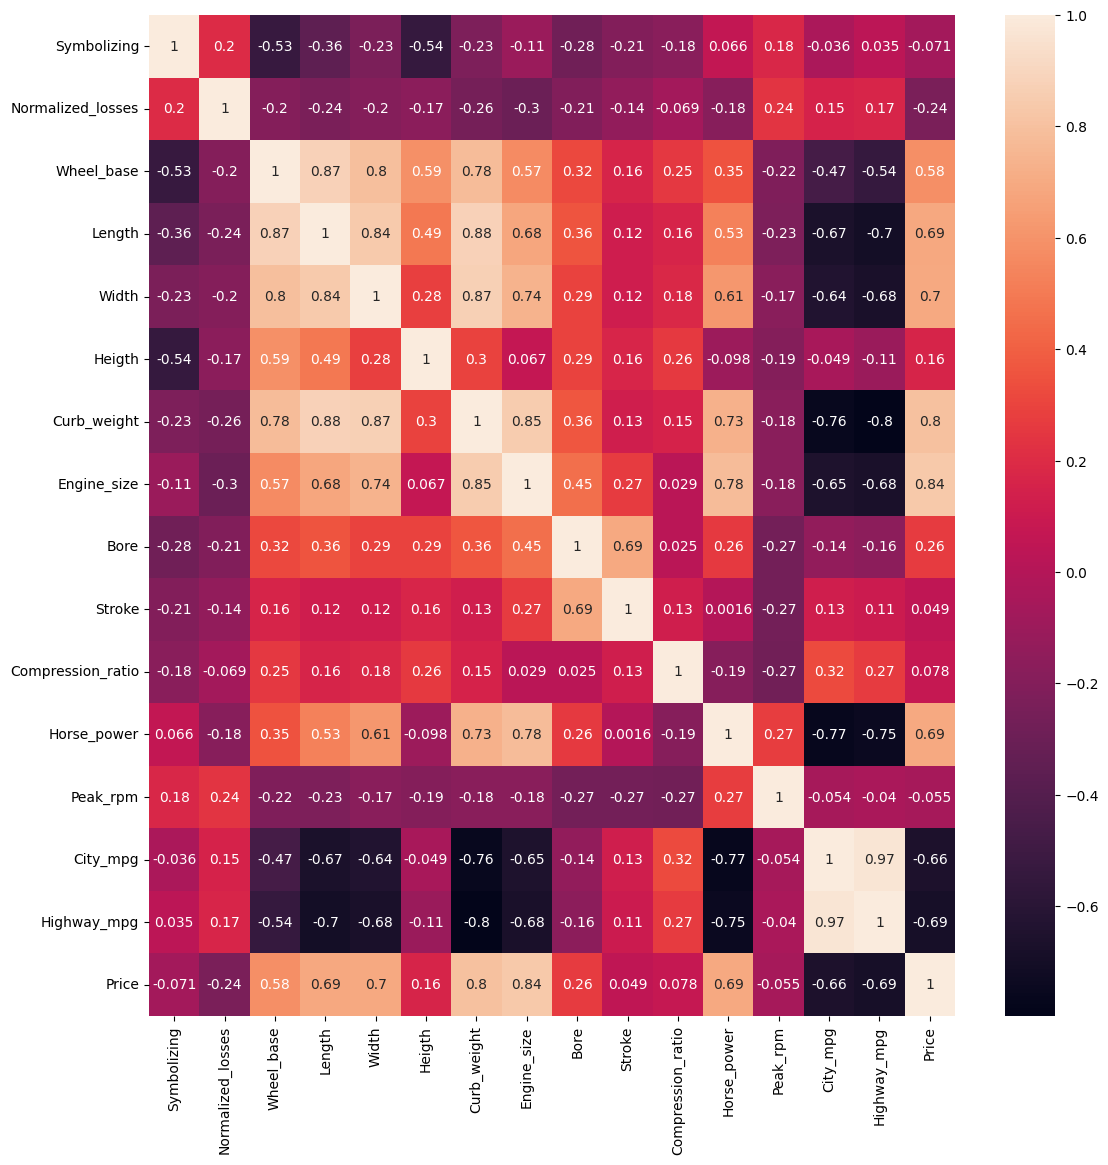

In [57]:
corr_df = copy_of_data.corr(method="pearson")

plt.figure(figsize=(13, 13))
sns.heatmap(corr_df, annot=True)
plt.show()

existe una correlacion negativa importante entrela "wheel base" y "heigth" con la variable objetivo "symbolizing". mientras que por el lado contrario variables como "horse power", "city mpg", "highway mpg", etc; tienden tanto a cero que pueden resultar irrelevantes por su poca correlacion con la variable objetivo

hay otras variables que tienen una alta correlacion entre ellas lo cual nos puede ayudar a predecir datos faltantes en caso de verlo necesario.

### Conclusiones generales E1

1- Si fueramos a agarrar un automovil aleatorio en esta muestra, lo mas probable es que sus caracteristicas, basado en sus modas, sean:

    - symboling: 0
    - normalized-losses: 97.6
    - make: toyota.
    - fuel-type: gas.
    - aspiration: std.
    - num-of-doors: four.
    - body-style: sedan.
    - drive-wheels: fwd.
    - engine-location: front.
    - wheel-base: 98.7
    - length: 174.0
    - width: 65.9
    - height: 53.7
    - curb-weight: 2555.5
    - engine-type: ohc.
    - num-of-cylinders: four.
    - engine-size: 126.9
    - fuel-system: mpfi.
    - bore: 3.26
    - stroke: 3.19
    - compression-ratio: 10.14
    - horsepower: 103.2
    - peak-rpm: 5075
    - city-mpg: 25.21
    - highway-mpg: 30.75
    - price: 12950
    
Basicamente, es un carro medianamente seguro, estilo sedan marca toyota. Estrato 3

2- Las variables categoricas que parecen merecer mayor observacion son las que tienen un numero de entradas relativamente variadas, siendo estas las sgtes:

    - Fuel system
    - Drive wheels
    - Body style
    - Number of doors
    - Maker
    
Esto debido a que si una variable tiene casi todas sus entradas en un solo campo, basicamente quiere decir que es un carro del comun.

3- Segun la matriz de correlacion, las variables cuantitativas de mayor peso son:

    - Wheel base
    - Length
    - Heigth
    - Width
    - Weight
    - Engine Size
    - City & Highway mpg

Estas variables tienen un mayor coeficiente de relacion entre si y otras variables, sea negativo o positivo.

Es decir, Si se hace un cambio en un carro a la base de la rueda, las dimensiones del chasis o el tamaño y velocidad del motor, es mas probable que haya un cambio en el indicador de riesgo

In [101]:
var_imp= ['Symbolizing', 'Normalized_losses','Fuel_system', 'Drive_wheels', 'Body_style', 'Num_of_doors', 'Make', 'Wheel_base', 'Length', 'Heigth', 'Curb_weight', 'Engine_size', 'City_mpg', 'Highway_mpg']

## PT2 - Limpieza de datos, entrenamiento y evaluacion de modelos

### Limpieza de datos

In [110]:
print(data.isna().sum())
# no hay nans aun

Symbolizing          0
Normalized_losses    0
Make                 0
Fuel_type            0
Aspiration           0
Num_of_doors         0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Heigth               0
Curb_weight          0
Engine_type          0
Num_of_cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horse_power          0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
Price                0
dtype: int64


In [111]:
for j in cuant_var:
    data[j] = data[j].astype(float)
#asegurar que todos los numericos sean en efecto numericos

In [112]:
# cambiar datos atipicos por NaN
data.replace(0.0, np.nan, inplace=True)
data.replace('0.0', np.nan, inplace=True)
data.replace('NaN', np.nan, inplace=True)
data.replace('?', np.nan, inplace=True)
data.replace('', np.nan, inplace=True)


In [113]:
print(data.isna().sum())

Symbolizing          67
Normalized_losses    41
Make                  0
Fuel_type             0
Aspiration            0
Num_of_doors          2
Body_style            0
Drive_wheels          0
Engine_location       0
Wheel_base            0
Length                0
Width                 0
Heigth                0
Curb_weight           0
Engine_type           0
Num_of_cylinders      0
Engine_size           0
Fuel_system           0
Bore                  4
Stroke                4
Compression_ratio     0
Horse_power           2
Peak_rpm              2
City_mpg              0
Highway_mpg           0
Price                 4
dtype: int64


La gran mayoria de datos atipicos se dan en Symbolizing y Normalized losses. Los datos 0.0 de NL fueron reemplazados con NaN en Symbolizing tambien, asi que se reemplazaran por 0 en esa columna especificamente. De resto, las otras caracteristicas seran reemplazadas por su media o moda

In [114]:
#ses= (data.Engine_location.mode().head()[0])
#print(ses)
#codigo para la moda

In [115]:
#data.City_mpg.mean(skipna=True)
#codigo para la media ignorando NaN


In [116]:
data.Symbolizing = data.Symbolizing.fillna(0)
data.Num_of_doors = data.Num_of_doors.fillna(data.Num_of_doors.mode().head()[0])
data.Bore = data.Bore.fillna(data.Bore.mean(skipna=True))
data.Stroke = data.Stroke.fillna(data.Stroke.mean(skipna=True))
data.Horse_power = data.Horse_power.fillna(data.Horse_power.mean(skipna=True))
data.Peak_rpm = data.Peak_rpm.fillna(data.Peak_rpm.mean(skipna=True))
data.Price = data.Price.fillna(data.Price.mean(skipna=True))
data.Normalized_losses = data.Normalized_losses.fillna(data.Normalized_losses.mean(skipna=True))

In [117]:
data.head()
#ahora no hay datos atipicos, a trabajar

,Symbolizing,Normalized_losses,Make,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [118]:
for j in cuant_var:
    data[j] = data[j].astype(float)
#asegurar que todos los numericos sean en efecto numericos

In [119]:
data.describe()

,Symbolizing,Normalized_losses,Wheel_base,Length,Width,Heigth,Curb_weight,Engine_size,Bore,Stroke,Compression_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [120]:
#Ahora solo usemos las variables importantes

data = data[var_imp]
data.head()

,Symbolizing,Normalized_losses,Fuel_system,Drive_wheels,Body_style,Num_of_doors,Make,Wheel_base,Length,Heigth,Curb_weight,Engine_size,City_mpg,Highway_mpg
0,3.0,122.0,mpfi,rwd,convertible,two,alfa-romero,88.6,168.8,48.8,2548.0,130.0,21.0,27.0
1,3.0,122.0,mpfi,rwd,convertible,two,alfa-romero,88.6,168.8,48.8,2548.0,130.0,21.0,27.0
2,1.0,122.0,mpfi,rwd,hatchback,two,alfa-romero,94.5,171.2,52.4,2823.0,152.0,19.0,26.0
3,2.0,164.0,mpfi,fwd,sedan,four,audi,99.8,176.6,54.3,2337.0,109.0,24.0,30.0
4,2.0,164.0,mpfi,4wd,sedan,four,audi,99.4,176.6,54.3,2824.0,136.0,18.0,22.0


In [121]:
#Convirtamos las variables categoricas en numeros para que los modelos lo puedan entender
imp_cat =  data.select_dtypes(['object']).columns

data[imp_cat] = data[imp_cat].apply(lambda x: pd.factorize(x)[0])
data.head()

,Symbolizing,Normalized_losses,Fuel_system,Drive_wheels,Body_style,Num_of_doors,Make,Wheel_base,Length,Heigth,Curb_weight,Engine_size,City_mpg,Highway_mpg
0,3.0,122.0,0,0,0,0,0,88.6,168.8,48.8,2548.0,130.0,21.0,27.0
1,3.0,122.0,0,0,0,0,0,88.6,168.8,48.8,2548.0,130.0,21.0,27.0
2,1.0,122.0,0,0,1,0,0,94.5,171.2,52.4,2823.0,152.0,19.0,26.0
3,2.0,164.0,0,1,2,1,1,99.8,176.6,54.3,2337.0,109.0,24.0,30.0
4,2.0,164.0,0,2,2,1,1,99.4,176.6,54.3,2824.0,136.0,18.0,22.0


In [122]:
data.describe()

,Symbolizing,Normalized_losses,Fuel_system,Drive_wheels,Body_style,Num_of_doors,Make,Wheel_base,Length,Heigth,Curb_weight,Engine_size,City_mpg,Highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,1.478049,0.673171,1.80000,0.565854,12.195122,98.756585,174.049268,53.724878,2555.565854,126.907317,25.219512,30.751220
std,1.245307,31.681008,2.184113,0.556171,0.83666,0.496858,6.274831,6.021776,12.337289,2.443522,520.680204,41.642693,6.542142,6.886443
min,-2.000000,65.000000,0.000000,0.000000,0.00000,0.000000,0.000000,86.600000,141.100000,47.800000,1488.000000,61.000000,13.000000,16.000000
25%,0.000000,101.000000,0.000000,0.000000,1.00000,0.000000,8.000000,94.500000,166.300000,52.000000,2145.000000,97.000000,19.000000,25.000000
50%,1.000000,122.000000,1.000000,1.000000,2.00000,1.000000,12.000000,97.000000,173.200000,54.100000,2414.000000,120.000000,24.000000,30.000000
75%,2.000000,137.000000,1.000000,1.000000,2.00000,1.000000,19.000000,102.400000,183.100000,55.500000,2935.000000,141.000000,30.000000,34.000000
max,3.000000,256.000000,7.000000,2.000000,4.00000,1.000000,21.000000,120.900000,208.100000,59.800000,4066.000000,326.000000,49.000000,54.000000


In [123]:
#normalizemos las variables cuantitativas
imp_cnt = ['Normalized_losses', 'Wheel_base','Length','Heigth','Curb_weight','Engine_size', 'City_mpg', 'Highway_mpg']
data[imp_cnt[0]].min()

65.0

In [124]:
def min_max_scaling(column):
    return(column-column.min()) / (column.max() - column.min())

In [125]:
for col in data[imp_cnt].columns:
    data[col] = min_max_scaling(data[col])

In [126]:
data.head()

,Symbolizing,Normalized_losses,Fuel_system,Drive_wheels,Body_style,Num_of_doors,Make,Wheel_base,Length,Heigth,Curb_weight,Engine_size,City_mpg,Highway_mpg
0,3.0,0.298429,0,0,0,0,0,0.058309,0.413433,0.083333,0.411171,0.260377,0.222222,0.289474
1,3.0,0.298429,0,0,0,0,0,0.058309,0.413433,0.083333,0.411171,0.260377,0.222222,0.289474
2,1.0,0.298429,0,0,1,0,0,0.230321,0.449254,0.383333,0.517843,0.343396,0.166667,0.263158
3,2.0,0.518325,0,1,2,1,1,0.384840,0.529851,0.541667,0.329325,0.181132,0.305556,0.368421
4,2.0,0.518325,0,2,2,1,1,0.373178,0.529851,0.541667,0.518231,0.283019,0.138889,0.157895


In [127]:
data.describe()

,Symbolizing,Normalized_losses,Fuel_system,Drive_wheels,Body_style,Num_of_doors,Make,Wheel_base,Length,Heigth,Curb_weight,Engine_size,City_mpg,Highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.298429,1.478049,0.673171,1.80000,0.565854,12.195122,0.354419,0.491780,0.493740,0.414106,0.248707,0.339431,0.388190
std,1.245307,0.165869,2.184113,0.556171,0.83666,0.496858,6.274831,0.175562,0.184139,0.203627,0.201971,0.157142,0.181726,0.181222
min,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.188482,0.000000,0.000000,1.00000,0.000000,8.000000,0.230321,0.376119,0.350000,0.254849,0.135849,0.166667,0.236842
50%,1.000000,0.298429,1.000000,1.000000,2.00000,1.000000,12.000000,0.303207,0.479104,0.525000,0.359193,0.222642,0.305556,0.368421
75%,2.000000,0.376963,1.000000,1.000000,2.00000,1.000000,19.000000,0.460641,0.626866,0.641667,0.561288,0.301887,0.472222,0.473684
max,3.000000,1.000000,7.000000,2.000000,4.00000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Entrenamiento y Analisis

Trabajaremos KNN, Naive Bayes y Regresion Logistica

#### KNN

In [134]:
x=data[imp_cnt]
y=data["Symbolizing"]
print(x)
#Compararemos todas las caracteristicas numericas con la variable objetivo: el riesgo / Symbolizing

     Normalized_losses  Wheel_base    Length    Heigth  Curb_weight  \
0             0.298429    0.058309  0.413433  0.083333     0.411171   
1             0.298429    0.058309  0.413433  0.083333     0.411171   
2             0.298429    0.230321  0.449254  0.383333     0.517843   
3             0.518325    0.384840  0.529851  0.541667     0.329325   
4             0.518325    0.373178  0.529851  0.541667     0.518231   
..                 ...         ...       ...       ...          ...   
200           0.157068    0.655977  0.711940  0.641667     0.567882   
201           0.157068    0.655977  0.711940  0.641667     0.605508   
202           0.157068    0.655977  0.711940  0.641667     0.591156   
203           0.157068    0.655977  0.711940  0.641667     0.670675   
204           0.157068    0.655977  0.711940  0.641667     0.610551   

     Engine_size  City_mpg  Highway_mpg  
0       0.260377  0.222222     0.289474  
1       0.260377  0.222222     0.289474  
2       0.343396  0.1

In [135]:
k=5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)

KNeighborsClassifier()

In [136]:
y_pred = knn.predict(x)
print("Clases reales   : ", y)
print("Clases predichas: ", y_pred)

Clases reales   :  0      3.0
1      3.0
2      1.0
3      2.0
4      2.0
      ... 
200   -1.0
201   -1.0
202   -1.0
203   -1.0
204   -1.0
Name: Symbolizing, Length: 205, dtype: float64
Clases predichas:  [ 3.  3.  3.  1.  0.  2.  0. -1.  0.  3.  0.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  1.  3.  3.  3.  3.  0.  0.  0.  0.  2.  0.  0.  0. -1. -1. -1. -1. -1.
  3.  0.  0.  0.  2.  1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  0.  0.  0.  3.  3.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1.  3.  3.
  3.  3.  3.  3.  0.  1.  3.  2.  3.  2.  3.  2.  1.  0.  2.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2. -1. -1. -1. -1. -1.  0.  0.
 -1. -1.  2.  2.  2.  2.  2.  2.  2.  2.  1.  0.  0.  0. -2. -1.

[[ 1  2  0  0  0  0]
 [ 0 20  1  1  0  0]
 [ 0  1 60  2  3  1]
 [ 0  1  7 43  0  3]
 [ 0  0  3 10 19  0]
 [ 0  0  2  1  1 23]]


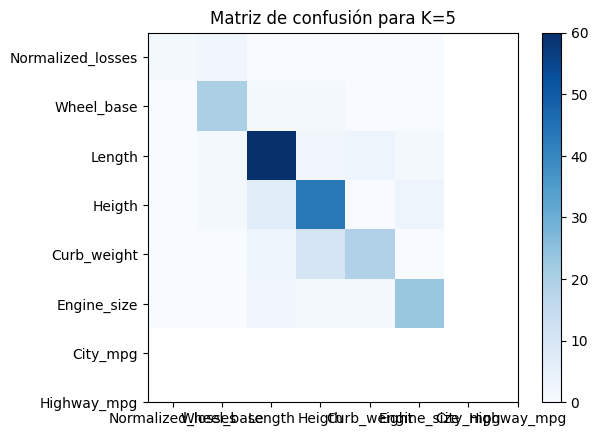

In [138]:
#matriz de confusion...
cm= metrics.confusion_matrix(y, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, data[imp_cnt])
_=plt.yticks(tick_marks, data[imp_cnt])

# USAR MATRIZ DE PUNTOS DEL EXTRA

Por el momento, esta matriz parece decir que las variables mas relacionadas con alto riezgo son width, height y curb_weight

In [139]:
ks=[1,2,3,5,7,9,11,15]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y, y_pred))

Con K =  1 , exactitud:  0.9951219512195122
Con K =  2 , exactitud:  0.8878048780487805
Con K =  3 , exactitud:  0.8731707317073171
Con K =  5 , exactitud:  0.8097560975609757
Con K =  7 , exactitud:  0.7463414634146341
Con K =  9 , exactitud:  0.7121951219512195
Con K =  11 , exactitud:  0.6682926829268293
Con K =  15 , exactitud:  0.6536585365853659


##### K-fold Cross Validation

In [141]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_exactitudes = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
knn_exactitudes

array([0.38095238, 0.42857143, 0.66666667, 0.71428571, 0.47619048,
       0.6       , 0.7       , 0.75      , 0.55      , 0.65      ])

antes de normalizar: La exactitud es pesima en la mayoria de casos, excepto en el septimo y noveno. Continuemos evaluando

despues de normalizar: la precision parece haber mejorado, veamos el scoring

In [143]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, x, y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.00 (+/- 0.00)
score_time: 0.01 (+/- 0.00)
test_accuracy: 0.59 (+/- 0.24)
test_precision_weighted: 0.56 (+/- 0.27)
test_recall_weighted: 0.59 (+/- 0.24)
test_f1_weighted: 0.55 (+/- 0.26)


La precision del test mejoro, aunque aun no es mayor a 70%, y la varianza sigue siendo bastante alta

#### Knn individual vs Symbolizing

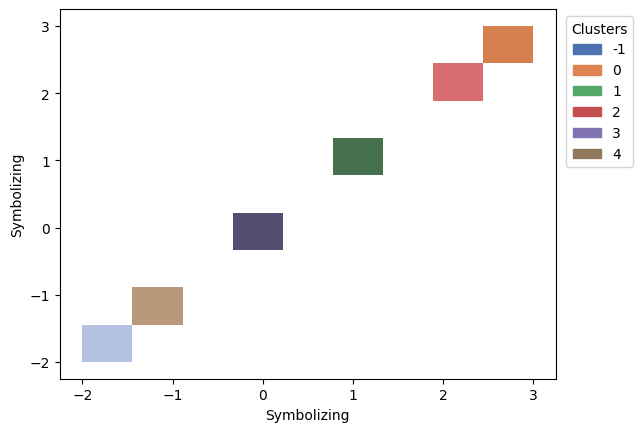

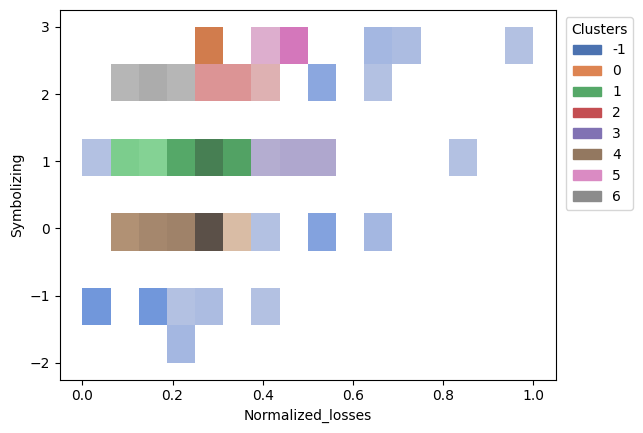

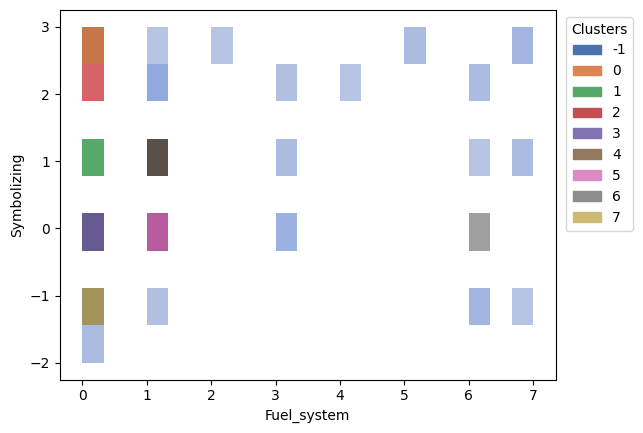

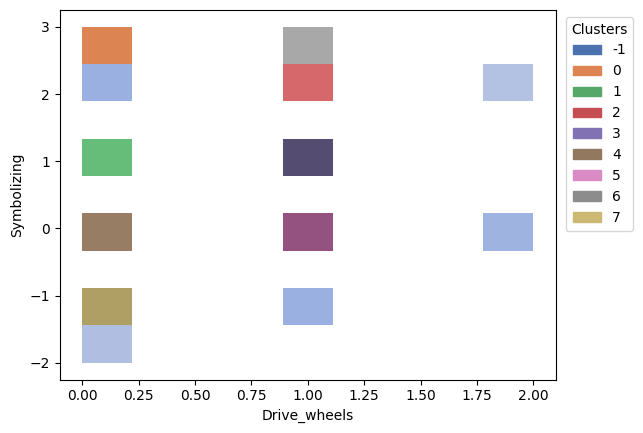

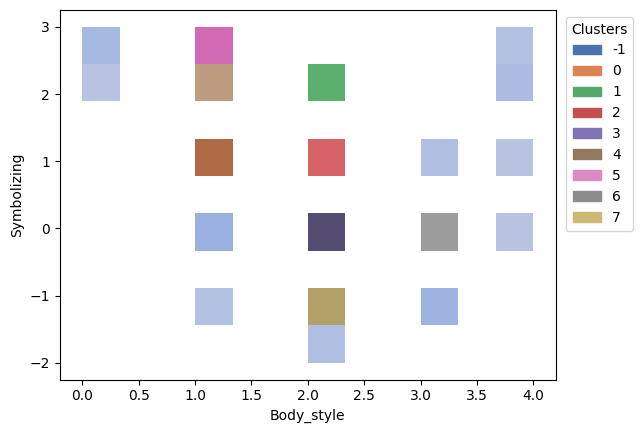

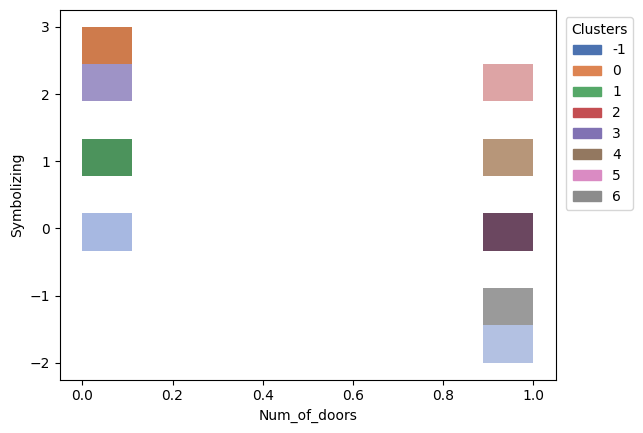

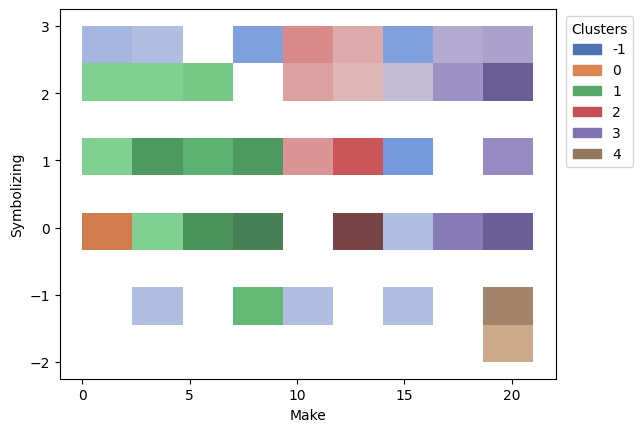

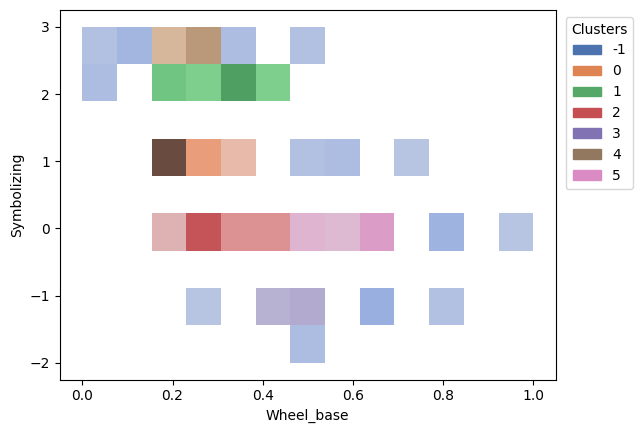

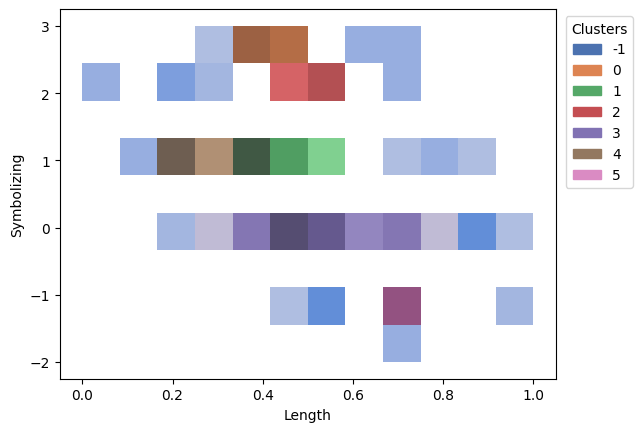

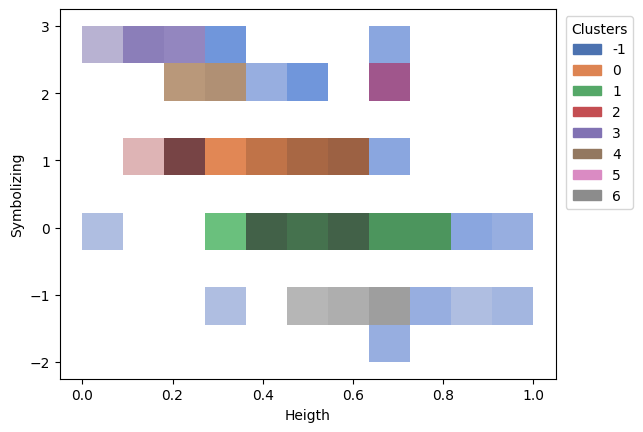

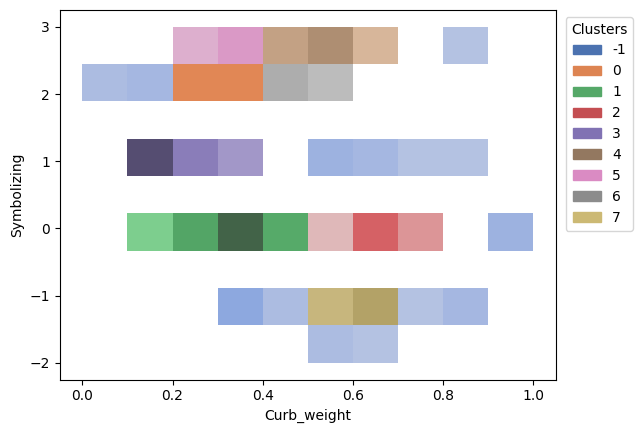

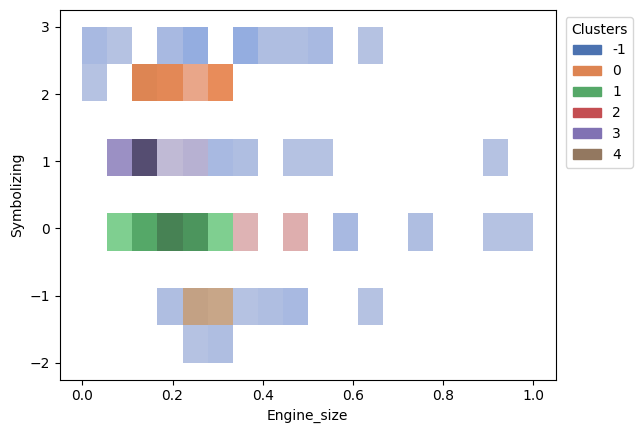

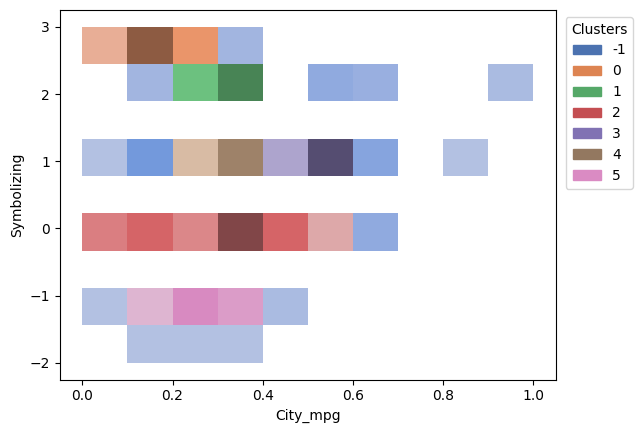

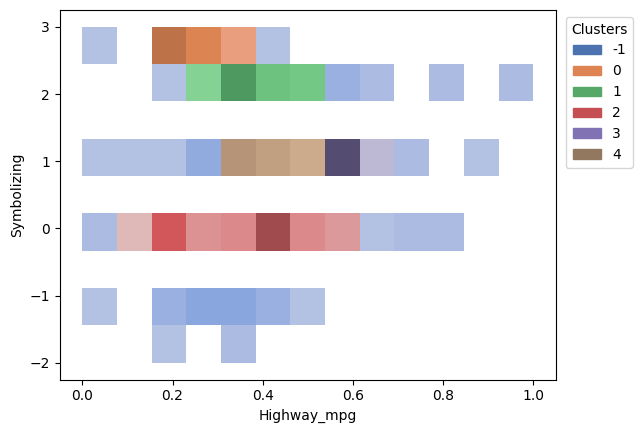

In [233]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X_train = []

# arreglo de entrenamientos
for i in data.columns:
    X_train.append(data[[i, 'Symbolizing']])
    
for j in X_train:
    nbs = NearestNeighbors(n_neighbors=5).fit(j)
    distances,_ = nbs.kneighbors(j)

    dbscan = DBSCAN(eps = data[j.columns[0]].max()/15, min_samples = 10).fit(j)
    labels = dbscan.labels_
    
    p = sns.histplot(data = data, x = str(j.columns[0]), y =  str(j.columns[1]), hue = dbscan.labels_, legend = "full", palette = "deep")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()


...

#### Knn individual vs Normalized_losses

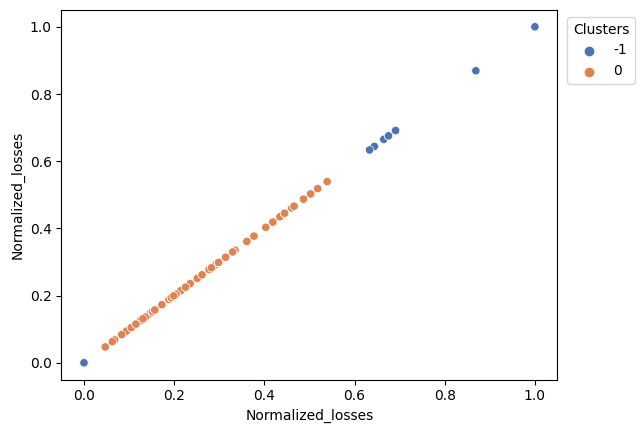

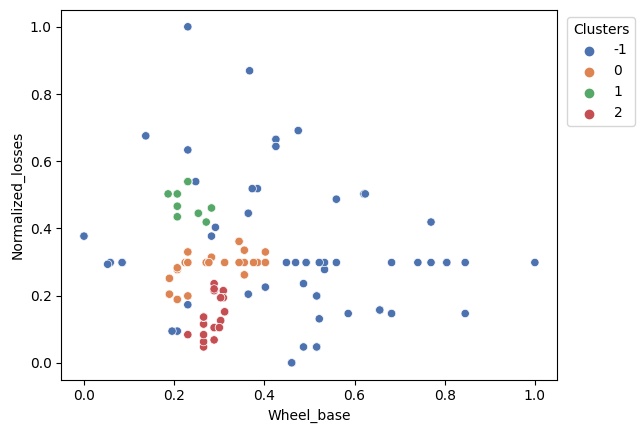

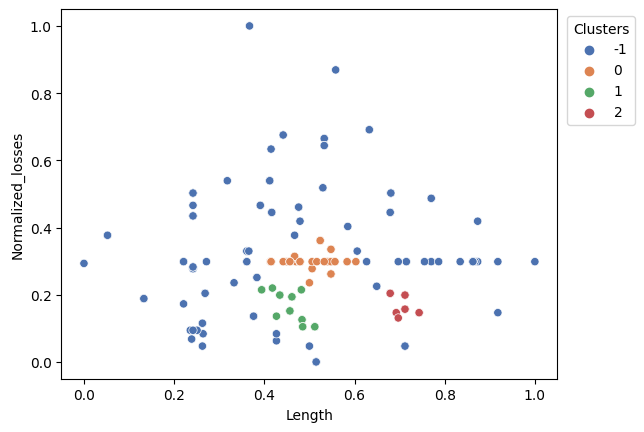

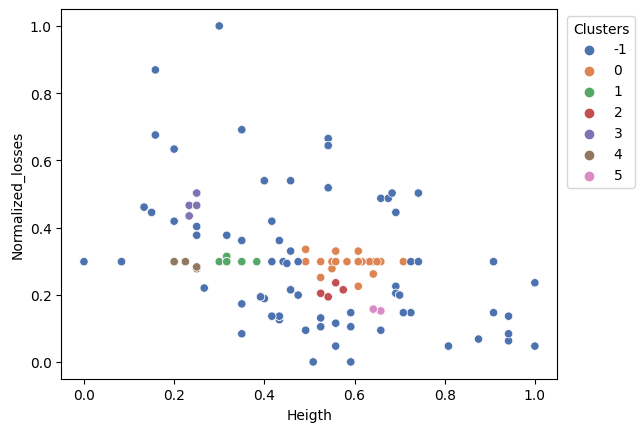

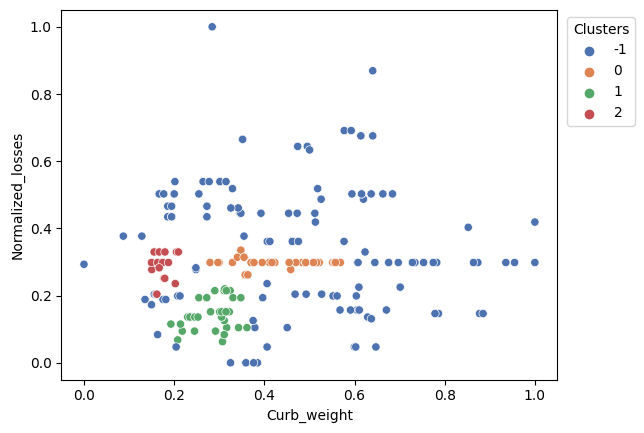

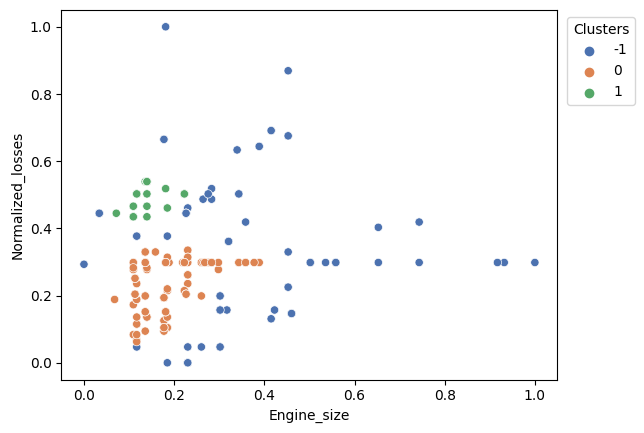

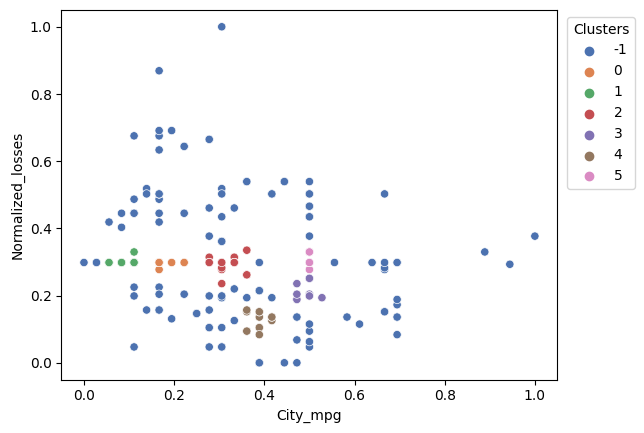

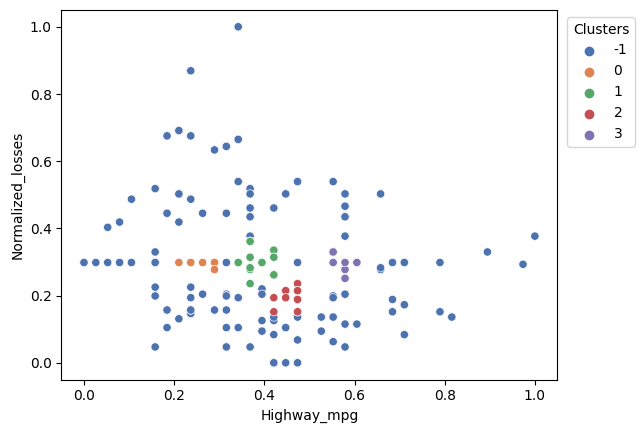

In [212]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X_train = []

# arreglo de entrenamientos
for i in data[imp_cnt].columns:
    X_train.append(data[[i, 'Normalized_losses']])

for j in X_train:
    nbs = NearestNeighbors(n_neighbors=5).fit(j)
    distances,_ = nbs.kneighbors(j)

    dbscan = DBSCAN(eps = 0.05, min_samples = 10).fit(j)
    labels = dbscan.labels_
    
    p = sns.scatterplot(data = data, x = str(j.columns[0]), y =  str(j.columns[1]), hue = dbscan.labels_, legend = "full", palette = "deep")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()


Normalized_losses vs Normalized_losses: la gran mayoria de carros estan entre el 0% y el 60% de las perdidas normalizadas. Despues de ese rango, hay un numero de carros, los cuales en teoria son el grupo de mayor perdida

Normalized_losses vs Wheel_base: hay 3 grupos principales: Todos estan entre una base de rueda del 20 al 40%, pero hay un grupo entre 0 al 20% de perdidas, otro del 20 al 40 y otro del 40 al 60%. Esto puede decir que, pese a que esten en un rango similar del tamaño de rueda, estos 3 grupos estan siendo influenciados por otros factores para tener un cambio en sus perdidas

Normalized_losses vs Lenght: a medida que aumenta el largo del carro, las perdidas aumentan, pero vuelven a disminuir. En general, el grupo con mas perdidas (~30%) tiene un largo de carro entre el 40 y 60%

Normalized_losses vs Height: La posicion de los grupos demuestra que a medida que va aumentando la altura, van disminyendo las perdidas

Normalized_losses vs Curb_weight: Hay un grupo de carros cuyo peso esta entre el 20 al 40% y cuyas perdidas normalizadas es baja. Otro grupo tiene menor peso (un poco mas bajo que el 20%) y otro en promedio con mayor peso que el primer grupo (mas del 40%), y los dos tienen alrededor del 50% de perdidas normalizadas. Posiblemente quiere decir que el peso ideal esta alrededor del 30%

Normalized_losses vs Engine_size: Hay un grupo cuyas perdidas son mayores que el 40% con un tamaño de motor alrededor del 15%. El otro grupo, se conforma de forma diferente: los carros con el menor tamaño de motor tienen un rango de perdidas entre el 5 y 25%, pero a medida que aumenta el tamaño del motor, el rango inferior amuenta, hasta que todos los carros con un tamaño de motor del 40% tienen perdidas del 25%

Normalized_losses vs City_mpg: El grupo con el menor nivel de perdidas esta alrededor del 40% de velocidad en la ciudad, lo que puede decir que los carros mas cercanos a la mediana de velocidad tienen menores perdidas.

Lo mismo con la velocidad en la carretera...

#### Naive Bayes

In [148]:
from sklearn import naive_bayes

In [149]:
data_bayes = np.concatenate((x, np.expand_dims(y, axis=1)), axis = 1)
data_bayes[0:13]

array([[0.29842932, 0.05830904, 0.41343284, 0.08333333, 0.41117145,
        0.26037736, 0.22222222, 0.28947368, 3.        ],
       [0.29842932, 0.05830904, 0.41343284, 0.08333333, 0.41117145,
        0.26037736, 0.22222222, 0.28947368, 3.        ],
       [0.29842932, 0.2303207 , 0.44925373, 0.38333333, 0.51784329,
        0.34339623, 0.16666667, 0.26315789, 1.        ],
       [0.51832461, 0.38483965, 0.52985075, 0.54166667, 0.32932506,
        0.18113208, 0.30555556, 0.36842105, 2.        ],
       [0.51832461, 0.37317784, 0.52985075, 0.54166667, 0.51823119,
        0.28301887, 0.13888889, 0.15789474, 2.        ],
       [0.29842932, 0.38483965, 0.54029851, 0.44166667, 0.39526765,
        0.28301887, 0.16666667, 0.23684211, 2.        ],
       [0.48691099, 0.55976676, 0.77014925, 0.65833333, 0.52598914,
        0.28301887, 0.16666667, 0.23684211, 1.        ],
       [0.29842932, 0.55976676, 0.77014925, 0.65833333, 0.56865787,
        0.28301887, 0.16666667, 0.23684211, 1.        ],


In [150]:
gnb = naive_bayes.GaussianNB()
modeloGNB = gnb.fit(x, y)

In [151]:
modeloGNB.class_count_

array([ 3., 22., 67., 54., 32., 27.])

In [152]:
modeloGNB.class_prior_

array([0.01463415, 0.10731707, 0.32682927, 0.26341463, 0.15609756,
       0.13170732])

In [153]:
modeloGNB.theta_

array([[0.19895288, 0.51603499, 0.7119403 , 0.7       , 0.57253685,
        0.28805031, 0.23148148, 0.26315789],
       [0.12517849, 0.56758548, 0.65698779, 0.67537879, 0.57146132,
        0.32212693, 0.27146465, 0.29665072],
       [0.26529655, 0.42330621, 0.55738472, 0.58159204, 0.47348402,
        0.2780062 , 0.32752902, 0.3692066 ],
       [0.3283886 , 0.27151496, 0.38112217, 0.41774691, 0.28698675,
        0.18280922, 0.42489712, 0.47417154],
       [0.31593586, 0.28097668, 0.41842351, 0.47682292, 0.32825834,
        0.19870283, 0.41493056, 0.47779605],
       [0.45220089, 0.244682  , 0.47816473, 0.27685185, 0.47692728,
        0.30286513, 0.17592593, 0.24561404]])

In [154]:
modeloGNB.sigma_

AttributeError: 'GaussianNB' object has no attribute 'sigma_'

##### Prediccion

In [157]:
y_pred = modeloGNB.predict(data[imp_cnt])

In [159]:
print("El modelo de Naïve Bayes se equivocó en %d de los %d registros que componen el dataset original"
      % ((y != y_pred).sum(), data[var_imp].shape[0]))

El modelo de Naïve Bayes se equivocó en 87 de los 205 registros que componen el dataset original


##### Comparacion con KNN

In [160]:
gnb_exactitudes = cross_val_score(gnb, x, y, cv=20, scoring='accuracy')
gnb_exactitudes

array([0.36363636, 0.54545455, 0.54545455, 0.36363636, 0.27272727,
       0.5       , 0.7       , 0.6       , 0.6       , 0.5       ,
       0.4       , 0.7       , 0.6       , 0.7       , 0.7       ,
       0.4       , 0.7       , 0.7       , 0.4       , 0.6       ])

In [161]:
print("KNN. Exactitudes: %0.2f (+/- %0.2f)" % (knn_exactitudes.mean(), knn_exactitudes.std() * 2))
print("GNB. Exactitudes: %0.2f (+/- %0.2f)" % (gnb_exactitudes.mean(), gnb_exactitudes.std() * 2))

KNN. Exactitudes: 0.59 (+/- 0.24)
GNB. Exactitudes: 0.54 (+/- 0.27)


#### Regresion Logistica

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from math import sqrt

from scipy import stats
import statsmodels.api as sm

In [191]:
Feature_Cols = var_imp
X = data[Feature_Cols]
y = data['Symbolizing']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train, y_train)

     Symbolizing  Normalized_losses  Fuel_system  Drive_wheels  Body_style  \
163          1.0           0.539267            1             0           2   
61           1.0           0.335079            1             1           1   
75           1.0           0.298429            0             0           1   
106          1.0           0.869110            0             0           1   
63           0.0           0.298429            6             1           2   
..           ...                ...          ...           ...         ...   
67          -1.0           0.146597            6             0           2   
192          0.0           0.298429            6             1           2   
117          0.0           0.502618            0             0           2   
47           0.0           0.418848            0             0           2   
172          2.0           0.361257            0             0           0   

     Num_of_doors  Make  Wheel_base    Length    Heigth  Curb_w

In [192]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)
#print(.reshape(-1, 1))
y_pred=logisticRegr.predict(X_test)


In [193]:
cnf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2,  1,  0,  0,  0],
       [ 0, 13,  1,  0,  0],
       [ 0,  3, 11,  0,  0],
       [ 0,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  9]])

Text(0.5, 427.9555555555555, 'Predicted label')

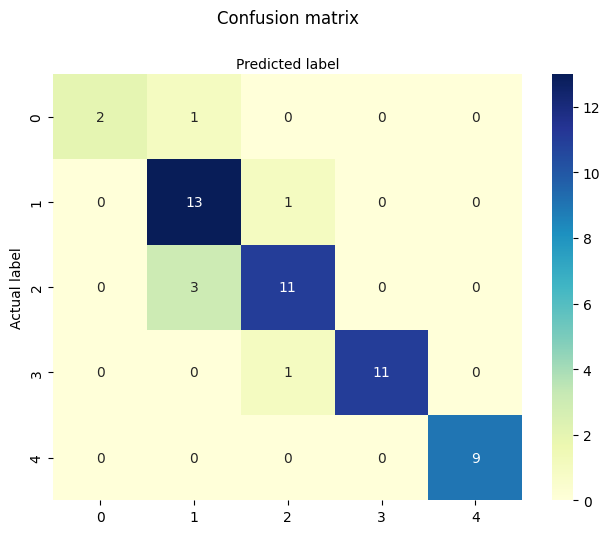

In [194]:
class_names=['Positivo','Negativo']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [195]:
print("Accuracy:",sk.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sk.metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",sk.metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8846153846153846
Precision: 0.895231465367212
Recall: 0.8846153846153846
